<a href="https://colab.research.google.com/github/4yonatan4/hr_who_is_going_to_quit/blob/master/HR_Who_is_Going_to_Quit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HR - Who is Going to Quit**

In [84]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [85]:
!git clone https://github.com/4yonatan4/Datasets.git

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [86]:
data = pd.read_csv('/content/Datasets/HR_data.csv')

In [87]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [88]:
data.shape

(14999, 10)

# One Hot Encoding
We have a number of features with verbal values.
We will use One-Hot-Encoding to get numerical values.

In [89]:
# Department and salary are categorical features. Let's encode them.
data = pd.concat([data, pd.get_dummies(data['Department'], prefix='Department')], axis=1)
data = pd.concat([data, pd.get_dummies(data['salary'], prefix='salary')], axis=1)

# Let's remove the original features
data = data.drop(columns=['Department', 'salary'])

In [90]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [91]:
# Important - we should handle NaNs
# First, let's see if there are any NaNs in the data

data.isnull().any(axis=0)
# We do not have NaN!

satisfaction_level        False
last_evaluation           False
number_project            False
average_montly_hours      False
time_spend_company        False
Work_accident             False
promotion_last_5years     False
left                      False
Department_IT             False
Department_RandD          False
Department_accounting     False
Department_hr             False
Department_management     False
Department_marketing      False
Department_product_mng    False
Department_sales          False
Department_support        False
Department_technical      False
salary_high               False
salary_low                False
salary_medium             False
dtype: bool

# Train and Evaluate

In [92]:
y = data['left']  
X = data.drop(columns=['left'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy:", "{:.4f}".format(lr.score(X_test, y_test)))

# K Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("\nKNN Accuracy:", "{:.4f}".format(knn.score(X_test, y_test)))

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)
print("\nRandom Forest Accuracy:", "{:.4f}".format(random_forest.score(X_test, y_test)))

# Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
print("\nMulti-layer Perceptron Accuracy:", "{:.4f}".format(mlp.score(X_test, y_test)))

Logistic Regression Accuracy: 0.7884

KNN Accuracy: 0.9342

Random Forest Accuracy: 0.9864

Multi-layer Perceptron Accuracy: 0.7591


# Random Forest Classifier is our choice!
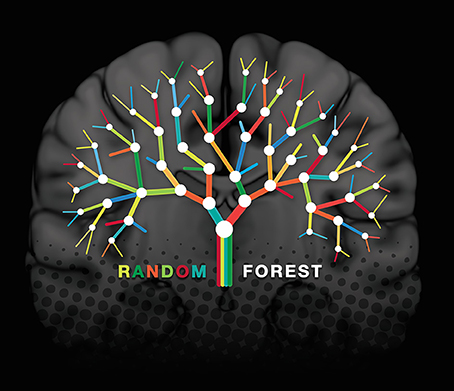


